# Objectifs : 
1. Tracer le top X des crypto ayant le plus gros volume d'échange ces 24 dernières heures 
2. Tracer la capitalisation des X plus grosse crypto 

In [15]:
# Libraries 
from binance.client import Client
from binance.exceptions import BinanceAPIException, BinanceRequestException
from datetime import datetime, timezone
import pandas as pd
from pycoingecko import CoinGeckoAPI
import matplotlib.pyplot as plt

In [16]:
# Connect to binance API
INPUT_FILE= "API_KEYS.txt"

with open(INPUT_FILE, 'r', encoding='utf-8') as file:
    contenu_liste = file.read()

KEYS = contenu_liste.split(',')
KEYS = [element.strip() for element in KEYS]

api_key = KEYS[0]
api_secret = KEYS[1]
client = Client(api_key,api_secret)

In [17]:
# Initialiser les constantes 
X_TOP_CRYPTO = 30


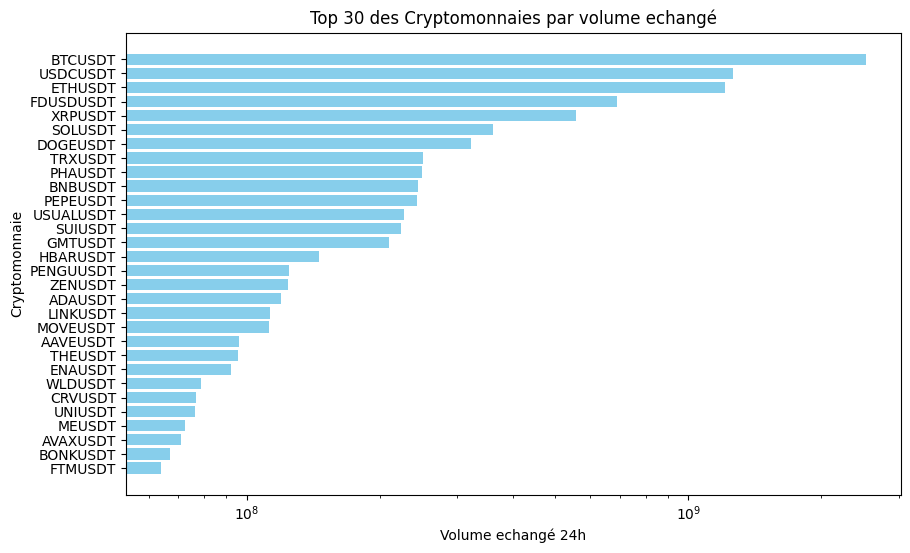

In [19]:
# Extraction du TOP 20 des paires ayant le plus de gros volume d'échange sur binance ces 24 dernières heures 
# Récupérer les informations de trading des symboles
exchange_info = client.get_exchange_info()
symbols = [s['symbol'] for s in exchange_info['symbols']]
# print(f"Total number of pairs on binance : {len(symbols)}")

# Récupérer les données des 24 dernières heures pour tous les symboles
tickers = client.get_ticker()

# Filtrer les paires ayant un volume d'échange élevé et les trier
sorted_tickers = sorted(tickers, key=lambda x: float(x['quoteVolume']), reverse=True)
df_quoteVolume = pd.DataFrame(sorted_tickers)
# Filtrer pour n'inclure que les paires ayant USDT comme base
df_quoteVolume = df_quoteVolume[df_quoteVolume['symbol'].str.endswith('USDT')]

# Mise en forme du df
df_quoteVolume['priceChange'] = df_quoteVolume['priceChange'].astype(float)
df_quoteVolume['priceChange'] = df_quoteVolume['priceChange'].round(2)
df_quoteVolume['priceChangePercent'] = df_quoteVolume['priceChangePercent'].astype(float)
df_quoteVolume['priceChangePercent'] = df_quoteVolume['priceChangePercent'].round(2)
df_quoteVolume['openPrice'] = df_quoteVolume['openPrice'].astype(float)
df_quoteVolume['openPrice'] = df_quoteVolume['openPrice'].round(2)
df_quoteVolume['highPrice'] = df_quoteVolume['highPrice'].astype(float)
df_quoteVolume['highPrice'] = df_quoteVolume['highPrice'].round(2)
df_quoteVolume['lowPrice'] = df_quoteVolume['lowPrice'].astype(float)
df_quoteVolume['lowPrice'] = df_quoteVolume['lowPrice'].round(2)
df_quoteVolume['volume'] = df_quoteVolume['volume'].astype(float)
df_quoteVolume['volume'] = df_quoteVolume['volume'].round(1)
df_quoteVolume['quoteVolume'] = df_quoteVolume['quoteVolume'].astype(float)
df_quoteVolume['quoteVolume'] = df_quoteVolume['quoteVolume'].round(1)
df_quoteVolume['openTime'] = pd.to_datetime(df_quoteVolume['openTime'], unit='ms')
df_quoteVolume['closeTime'] = pd.to_datetime(df_quoteVolume['closeTime'], unit='ms')
df_quoteVolume['openTime'] = df_quoteVolume['openTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_quoteVolume['closeTime'] = df_quoteVolume['closeTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_quoteVolume.drop(columns=['weightedAvgPrice','prevClosePrice','lastQty','lastPrice','bidPrice','bidQty','askPrice','askQty','firstId','lastId'], inplace=True)



# Listing du top 20
top_20_quoteVolume = df_quoteVolume['symbol'].head(X_TOP_CRYPTO).tolist()
# print(top_20_quoteVolume)
# print(df_quoteVolume.head(20))

# df_quoteVolume.head(30)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.barh(df_quoteVolume['symbol'].head(X_TOP_CRYPTO), df_quoteVolume['quoteVolume'].head(X_TOP_CRYPTO), color='skyblue')
plt.xlabel('Volume echangé 24h')
plt.xscale('log')  # Appliquer une échelle logarithmique sur l'axe X
plt.ylabel('Cryptomonnaie')
plt.title(f'Top {X_TOP_CRYPTO} des Cryptomonnaies par volume echangé')
plt.gca().invert_yaxis()  # Inverser l'axe des Y pour afficher la plus grande capitalisation en haut
plt.show()

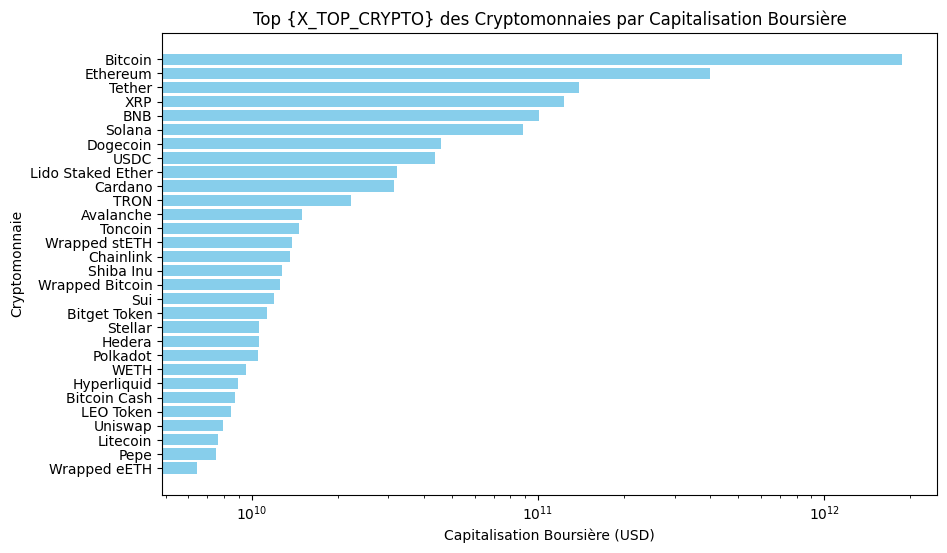

In [22]:
# Initialiser CoinGeckoAPI
cg = CoinGeckoAPI()

# Obtenir les 20 premières cryptomonnaies par capitalisation boursière
coins = cg.get_coins_markets(vs_currency='usd', order='market_cap_desc', per_page=X_TOP_CRYPTO, page=1)

# Créer une liste de dictionnaires avec les informations souhaitées
coin_data = [{
    'name': coin['name'],
    'symbol': coin['symbol'],
    'market_cap': coin['market_cap']
} for coin in coins]

# Créer un DataFrame
df = pd.DataFrame(coin_data)

# Trier le DataFrame par capitalisation
df = df.sort_values(by='market_cap', ascending=True)

# Créer le graphique
plt.figure(figsize=(10, 6))
plt.barh(df['name'], df['market_cap'], color='skyblue')
plt.xlabel('Capitalisation Boursière (USD)')
plt.xscale('log')  # Appliquer une échelle logarithmique sur l'axe X
plt.ylabel('Cryptomonnaie')
plt.title('Top {X_TOP_CRYPTO} des Cryptomonnaies par Capitalisation Boursière')
# plt.gca().invert_yaxis()  # Inverser l'axe des Y pour afficher la plus grande capitalisation en haut
plt.show()
